In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
netflix = pd.read_csv('netflix_titles_2021.csv')

# Observations in dataset

Dataset obtained from - https://www.kaggle.com/datasets/swatikhedekar/exploratory-data-analysis-on-netflix-data/data?select=netflix_titles_2021.csv

### 1. Dirty Data
    - missing data in director, cast, country, date_added, rating and duration columns --> Filled missing data in rows with more than 100 missing values and deleted others with fewer missing values
    - missing percentage of data in director col is HIGHEST(29%) --> Filled missing values by "John Doe"
    - wrong data types in date_added col --> Corrected to date_time format
    
### 2. Messy Data
    - inconsistent formatting in duration column - seasons and min

In [4]:
netflix.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [5]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

## Checking missing values

In [9]:
missing = netflix.isnull().sum()
missing 

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
len(netflix)

8807

In [11]:
miss_cent = (netflix.isnull().sum()/len(netflix)) * 100
miss_cent

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [12]:
missing_df = pd.concat([missing,miss_cent],axis=1, keys=['missing', 'miss%'])
missing_df

,missing,miss%
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
director,2634,29.908028
cast,825,9.367549
country,831,9.435676
date_added,10,0.113546
release_year,0,0.000000
rating,4,0.045418
duration,3,0.034064


In [13]:
import seaborn as sns

<Axes: >

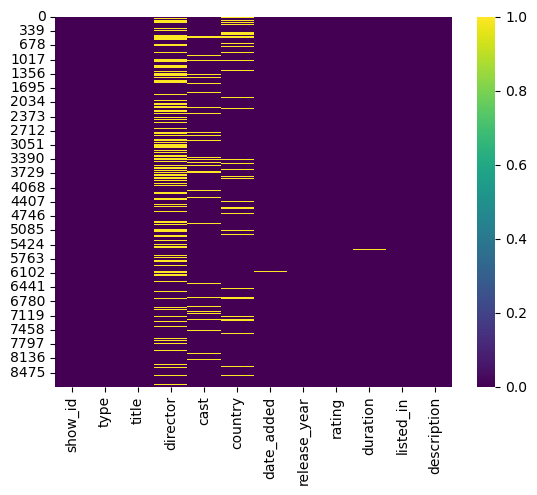

In [14]:
sns.heatmap(netflix.isnull(), cmap='viridis')

## Filling missing values

In [16]:
netflix[['director','cast']] = netflix[['director','cast']].fillna({'director':'John Doe',"cast":'actors'})

In [17]:
netflix['country'] = netflix['country'].fillna('Random_Country')

In [18]:
# dropped the rows with missing values where % of data missing was <1%
netflix = netflix.dropna()

In [19]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,actors,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,John Doe,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Random_Country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,John Doe,actors,Random_Country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,John Doe,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Checking for duplicate values

In [21]:
netflix[netflix.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


-- No duplicated values found in the dataset

## Correcting data_type of `date_added` column from `OBJECT` to `date_time`

In [24]:
# Converting string column containing date_time info into date_time format

netflix['date_added'] = pd.to_datetime(netflix['date_added'], format='mixed')

## Different movies (count) according to their `rating`

<Axes: xlabel='rating', ylabel='count'>

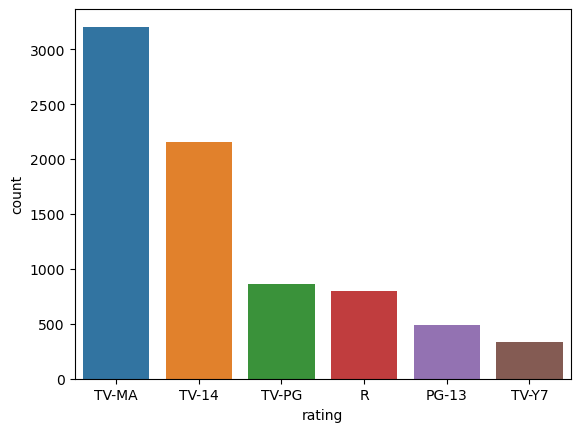

In [26]:
sns.barplot(data = netflix, x = netflix['rating'].value_counts().head(6).index, y=netflix['rating'].value_counts().head(6))

## Different movies (count) according to their `release_year`

<Axes: xlabel='release_year', ylabel='count'>

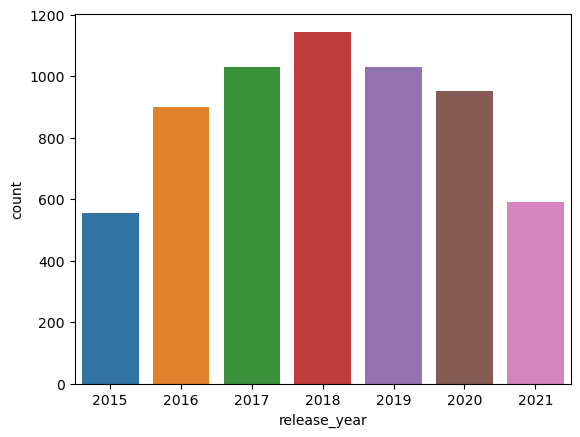

In [28]:
sns.barplot(data = netflix, x = netflix['release_year'].value_counts().head(7).index, y=netflix['release_year'].value_counts().head(7))

In [29]:
netflix['country'].value_counts().index[0:4]

Index(['United States', 'India', 'Random_Country', 'United Kingdom'], dtype='object', name='country')

<Axes: xlabel='country', ylabel='count'>

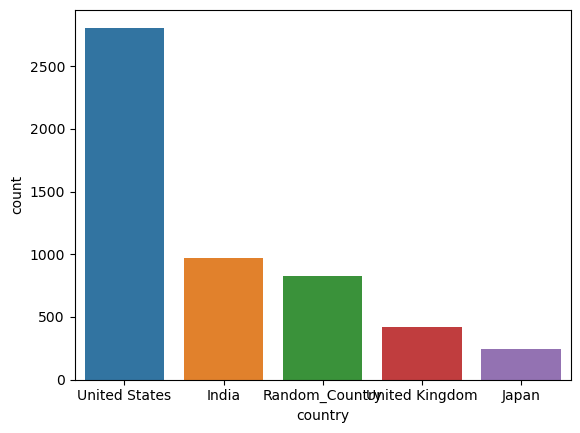

In [30]:
sns.barplot(y=netflix['country'].value_counts().head(5), x=netflix['country'].value_counts().index[0:5])

<Axes: ylabel='count'>

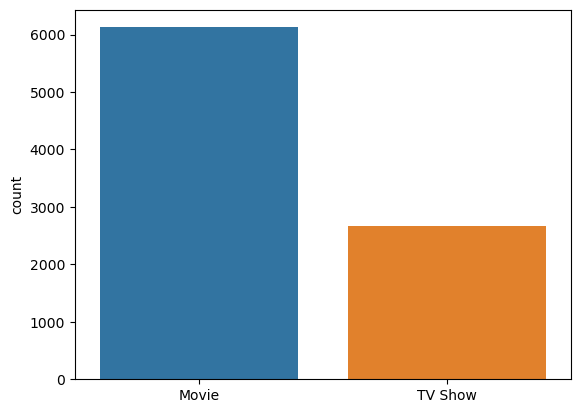

In [32]:
sns.barplot(y=netflix['type'].value_counts(), x=netflix['type'].unique())

## Directors with the most number of movies

In [34]:
netflix['director'].value_counts().head(7)

director
John Doe                  2621
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Name: count, dtype: int64

<Axes: xlabel='director', ylabel='count'>

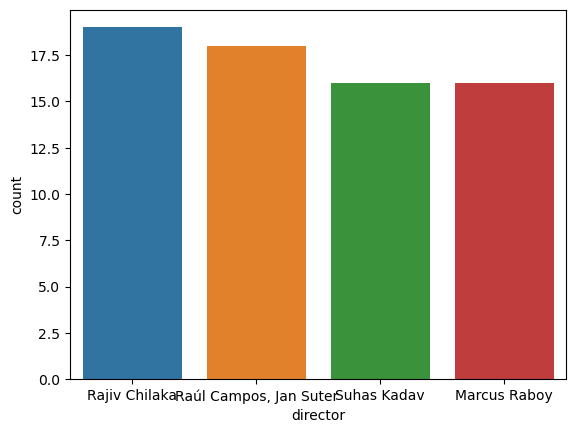

In [35]:
sns.barplot(y=netflix['director'].value_counts().iloc[1:5], x=netflix['director'].value_counts().index[1:5])

## Show `Titles` of all `TV shows` that were only released in `India`

In [37]:
netflix[(netflix['country'] == 'India') & (netflix['type'] == 'TV Show')]['title'].unique()

array(['Kota Factory', 'Chhota Bheem', 'Dharmakshetra',
       'Raja Rasoi Aur Anya Kahaniyan', 'Stories by Rabindranath Tagore',
       'The Creative Indians', 'Navarasa', 'Alma Matters',
       'Sab Jholmaal Hai', 'Lava Ka Dhaava', 'The Big Day',
       'Bombay Begums', 'Zindagi in Short', 'Pitta Kathalu',
       'Mighty Little Bheem: Kite Festival', 'Regiment Diaries',
       'Paava Kadhaigal', 'Bhaag Beanie Bhaag',
       'Fabulous Lives of Bollywood Wives', 'Mismatched',
       'Bad Boy Billionaires: India', 'Masaba Masaba', 'Little Singham',
       'Betaal', 'ChuChu TV Nursery Rhymes & Kids Songs (Hindi)',
       'Hasmukh', 'Akbar\xa0Birbal', 'Ladies Up', 'She',
       'Mighty Little Bheem: Festival of Colors', 'Taj Mahal 1989',
       'Jamtara - Sabka Number Ayega', 'Little Things',
       'Mighty Little Bheem: Diwali', 'College Romance',
       'Engineering Girls', 'Girls Hostel', 'Inmates', 'Bard of Blood',
       'Typewriter', 'Leila', 'Delhi Crime',
       'Cricket Fever: Mu

## In how many movies Tom Cruise was cast?

In [39]:
netflix[netflix['cast'].str.contains('Tom Cruise')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
341,s342,Movie,Magnolia,Paul Thomas Anderson,"John C. Reilly, Philip Baker Hall, Tom Cruise,...",United States,2021-08-01,1999,R,189 min,"Dramas, Independent Movies","Through chance, history and divine interventio..."
1254,s1255,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,2021-03-01,1988,R,134 min,"Classic Movies, Dramas","Motivated by money, a selfish workaholic seeki..."


### Ignore the below block 

In [57]:
# Ignore the below code

# netflix_2 = netflix.copy()

# netflix_2.head(2)

# for x in range(len(netflix_2)):
#     if (netflix_2['duration'].str.contains('min')):
#         a = int(netflix_2['duration'][x][:3].strip())
#         if a > 180:
#             netflix_2['duration_catg'].append('very high runtime')
#         elif (a > 120) & (a <= 180):
#             netflix_2['duration_catg'].append('medium-to-high runtime')
#         elif (a > 60) & (a <= 120):
#             netflix_2['duration_catg'].append('low-to-medium runtime')
#         elif (a > 0) & (a <= 60):
#             netflix_2['duration_catg'].append('low runtime')